# HRF distribution 

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define variables
MAIN_PATH = '/Volumes/FedericaCardillo/pre-processing/projects/PROJECT_EGRET-AAA/derivatives'
denoising = 'nordic'
project = 'PROJECT_EGRET-AAA'
rois_list = np.array([['V1', 'V2', 'V3'], [1, 2, 3]])
atlas = 'manual'
model_name = 'nelder-mead'
depth = 'GM'

# Subject lists
glaucoma_subjects = ['sub-02', 'sub-04', 'sub-09', 'sub-10', 'sub-11', 'sub-14', 'sub-17']
controls_subjects = ['sub-22', 'sub-25', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32', 'sub-34', 'sub-35', 'sub-39', 'sub-38']

# Combine all subjects into a single list
all_subjects = glaucoma_subjects + controls_subjects

# Initialize lists to store hrf_1 and hrf_2 values for all subjects
all_hrf_1 = []
all_hrf_2 = []

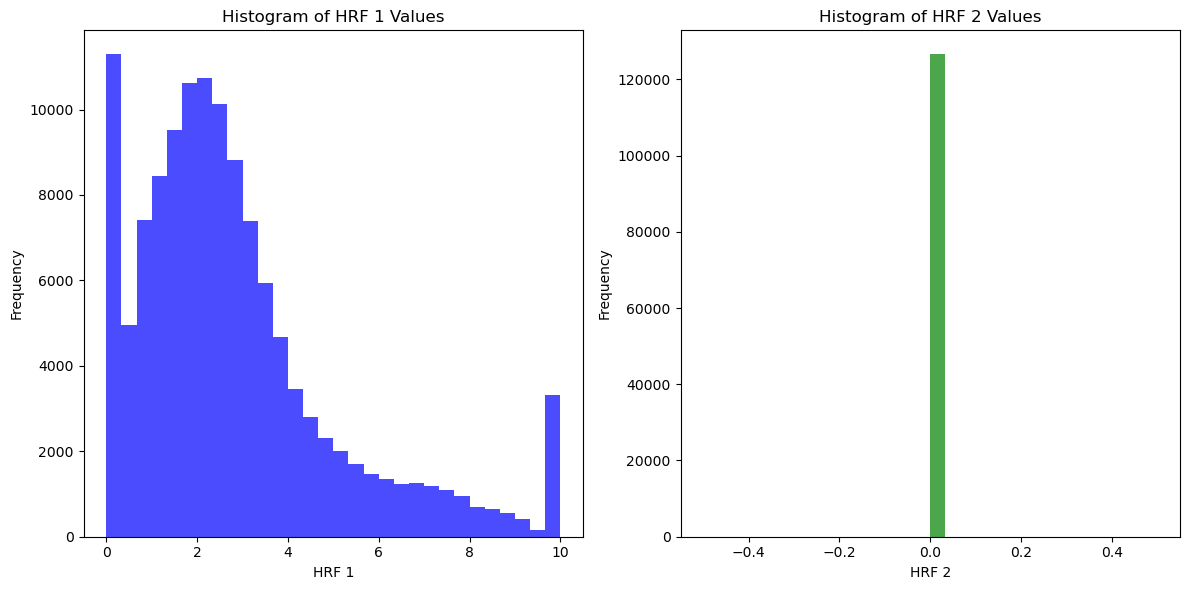

In [4]:
# Function to load pickle file and extract hrf_1 and hrf_2
def extract_hrf_params(subject):
    # Construct the pickle file path
    pkl_file = os.path.join(f'{MAIN_PATH}/pRFM/{subject}/ses-02/{denoising}/', f'model-{atlas}-{model_name}-{depth}_desc-prf_params.pkl')
    
    # Load the pickle file
    with open(pkl_file, "rb") as f:
        out_dict = pickle.load(f)
    
    # Extract prf_params
    prf_params = out_dict.get('model').iterative_search_params
    
    # Apply the filtering conditions for eccentricity, size, and variance explained
    eccentricity = np.sqrt(prf_params[:, 1]**2 + prf_params[:, 0]**2)
    size = prf_params[:, 2]
    variance_explained = prf_params[:, 7]
    
    # Define mask for the filtering criteria
    mask = (eccentricity > 0) & (eccentricity < 7) & (size > 0.11) & (variance_explained > 0.3)
    
    # Apply mask to extract filtered hrf_1 and hrf_2 values
    hrf_1 = prf_params[mask, 5]
    hrf_2 = prf_params[mask, 6]
    
    # Append the values to the global lists
    all_hrf_1.extend(hrf_1)
    all_hrf_2.extend(hrf_2)

# Iterate through all subjects and extract the parameters
for subject in all_subjects:
    extract_hrf_params(subject)

# Convert lists to numpy arrays for easier manipulation
all_hrf_1 = np.array(all_hrf_1)
all_hrf_2 = np.array(all_hrf_2)

# Plot histograms of hrf_1 and hrf_2
plt.figure(figsize=(12, 6))

# Histogram for hrf_1
plt.subplot(1, 2, 1)
plt.hist(all_hrf_1, bins=30, alpha=0.7, color='b')
plt.title('Histogram of HRF 1 Values')
plt.xlabel('HRF 1')
plt.ylabel('Frequency')

# Histogram for hrf_2
plt.subplot(1, 2, 2)
plt.hist(all_hrf_2, bins=30, alpha=0.7, color='g')
plt.title('Histogram of HRF 2 Values')
plt.xlabel('HRF 2')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

(22297, 128)
(9333, 128)


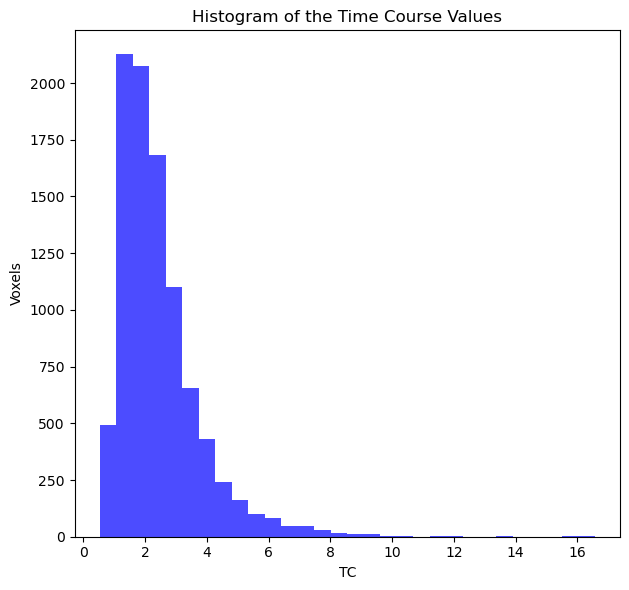

In [17]:
# Construct the pickle file path
pkl_file = os.path.join(f'{MAIN_PATH}/pRFM/{subject}/ses-02/{denoising}/', f'model-{atlas}-{model_name}-{depth}_desc-prf_params.pkl')
    
# Load the pickle file
with open(pkl_file, "rb") as f:
    out_dict = pickle.load(f)
    
# Extract prf_params
prf_params = out_dict.get('model').data
print(prf_params.shape)

# Apply the filtering conditions for eccentricity, size, and variance explained
eccentricity = np.sqrt(prf_params[:, 1]**2 + prf_params[:, 0]**2)
size = prf_params[:, 2]
variance_explained = prf_params[:, 7]
    
# Define mask for the filtering criteria
mask = (eccentricity > 0) & (eccentricity < 7) & (size > 0.11) & (variance_explained > 0.3)

all_tc = []
#tc = prf_params[mask, 5]
tc = out_dict.get('model').data[mask]
all_tc.extend(tc)
all_tc = np.array(np.max(all_tc, axis=1))
print(tc.shape)

# Plot histograms of hrf_1 and hrf_2
plt.figure(figsize=(12, 6))

# Histogram for hrf_1
plt.subplot(1, 2, 1)
plt.hist(all_tc, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of the Time Course Values')
plt.xlabel('TC')
plt.ylabel('Voxels')

# Show the plots
plt.tight_layout()
plt.show()